<a href="https://colab.research.google.com/github/cronegit/5th-workshops/blob/master/Neuroevolutionary-computational-techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install py-hyperneat

# NEAT Genotype and phenotype expression
![alt text](https://i.imgur.com/Xtlzo8G.png)

NEAT key techniques:
*   Innovation markers
*   Speciation
*   Augmenting topologies





In [0]:
from neat.population import Population
from neat.neural_network import NeuralNetwork
from neat.genome import Genome, Phenotype
from neat.genes import NodeGene, ConnectionGene, NodeType
from neat.neat import Neat, TrainTask
from neat.activation_functions import ActivationFunction

import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
# Select tanh function to initialize activations
tanh_function = ActivationFunction().functions['TANH']

# 10 layers
num_layers = 10

# Node genes
input_node_0 = NodeGene(0, NodeType.INPUT, tanh_function, 0)
input_node_1 = NodeGene(1, NodeType.INPUT, tanh_function, 0)
output_node = NodeGene(2, NodeType.OUTPUT, tanh_function, num_layers - 1)

nodes = [input_node_0, input_node_1, output_node]

In [0]:
# Connection genes: innovation, in node, out node, weight, enable?, in node layer, out node layer
connection_0 = ConnectionGene(0, input_node_0.gene_id, output_node.gene_id, 0.1, True, input_node_0.layer, output_node.layer)
connection_1 = ConnectionGene(1, input_node_1.gene_id, output_node.gene_id, 0.2, True, input_node_1.layer, output_node.layer)

connections = [connection_0, connection_1]

In [0]:
# Create seed genome, specify connections weight range
weights_range = (-8.0, 8.0)
genome = Genome(weights_range)

# Assemble genome from nodes and connections info. 
# Need to specify the type of phenotype to construct and number of layers
genome.create_genome_from_genes(nodes, connections, Phenotype.LAYERED_NETWORK, num_layers)

In [0]:
# Create new population
pop = Population()

# Set hyperparameters of evolution
pop.params.population_max = 100
pop.params.distance_coeff_1 = 0.6
pop.params.distance_coeff_2 = 0.6
pop.params.distance_coeff_3 = 1.0
pop.params.distance_threshold = 9.0 #Adjusted while training
pop.params.small_genome_coeff = 8
pop.params.no_crossover_offspring = 0.85

pop.params.survival_selection = True
pop.params.allow_clones = True
pop.params.survival_threshold = 0.4
pop.params.elite_offspring_param = 0.1

pop.params.min_species = 4
pop.params.max_species = 10

# Set probabilities of interspecies mating and mutations
# Interspecies probability of mate
pop.prob.interspecies_mating = 0.2

# Small organisms mutation probabilities
pop.prob.sp_new_node = 0.001
pop.prob.sp_new_connection = 0.002

# Large organisms mutation probabilities
pop.prob.lp_new_node = 0.0003
pop.prob.lp_new_connection = 0.0004

# Mutation weights and activation probabilities
pop.prob.mutation_weight = 0.1
pop.prob.mutate_activation = 0.05

# Create population of organisms from the seed genome
pop.start_population(genome)
print(len(pop.organisms))

100


In [0]:
# Define a fitness function.
# Current function intend to solve XOR problem, given the four possible inputs
def fitness(input_data, net):
    error = 0.0
    outputs = []

    logic = input_data[0]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[1]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[2]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[3]
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    return math.pow(4 - error, 2)

In [0]:
# Create an instance of Neat algorithm, 100 generations
num_generations = 100
evolution = Neat(fitness_eval=fitness, train_task=TrainTask.PREDICTION, max_generation=num_generations)

# Set population to evolutionary algorithm. Limit activation functions to tanh for this example
evolution.pop = pop
evolution.pop.activation_set.use_only_tanh()

In [0]:
# Define input sets to fit with fitness function
xor_eval = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Run training
evolution.set_multi_input(xor_eval)

In [0]:
def epoch(algorithm, print_stats=False):
		algorithm.pop.sort_organisms()
		algorithm.historical_avg_fitness.append(algorithm.avg_fitness)
		algorithm.historical_best_fitness.append(algorithm.best_epoch_fitness)

		algorithm.pop.adjust_speciate_threshold()
		algorithm.pop.compute_offspring()

		algorithm.pop.reproduce()
		algorithm.pop.speciate()

		algorithm.pop.remove_empty_species()
		
		if print_stats == True:
			print('Generation #{:d}: species = {:d}, champion_fitness = {:f}, avg_generation_fitness = {:f}'.format(algorithm.current_generation, len(algorithm.pop.species), algorithm.pop.champion_fitness, algorithm.avg_fitness))

		algorithm.current_generation += 1

In [0]:
while evolution.current_generation < evolution.max_generation:
			evolution.evaluate_population()    
			epoch(evolution, print_stats=True)

Generation #0: species = 1, champion_fitness = 6.296987, avg_generation_fitness = 2.371687
Generation #1: species = 1, champion_fitness = 9.168064, avg_generation_fitness = 4.002230
Generation #2: species = 1, champion_fitness = 9.168064, avg_generation_fitness = 4.951837
Generation #3: species = 1, champion_fitness = 10.958737, avg_generation_fitness = 5.370078
Generation #4: species = 1, champion_fitness = 10.958737, avg_generation_fitness = 5.961591
Generation #5: species = 1, champion_fitness = 10.958737, avg_generation_fitness = 5.452408
Generation #6: species = 1, champion_fitness = 12.060577, avg_generation_fitness = 6.048109
Generation #7: species = 1, champion_fitness = 13.212406, avg_generation_fitness = 7.005598
Generation #8: species = 1, champion_fitness = 13.279851, avg_generation_fitness = 7.666515
Generation #9: species = 1, champion_fitness = 13.279851, avg_generation_fitness = 6.961963
Generation #10: species = 1, champion_fitness = 13.279851, avg_generation_fitness =

In [0]:
evolution.pop.restart_population()
avg, best = evolution.run_multiple_trainings(5)

Iteration #0: species = 49, champion_fitness = 0.000000, avg_generation_fitness = 7.611596
Iteration #1: species = 4, champion_fitness = 15.989438, avg_generation_fitness = 8.589331
Iteration #2: species = 5, champion_fitness = 15.729434, avg_generation_fitness = 8.859352
Iteration #3: species = 8, champion_fitness = 15.538571, avg_generation_fitness = 7.525859
Iteration #4: species = 8, champion_fitness = 15.861123, avg_generation_fitness = 7.642757


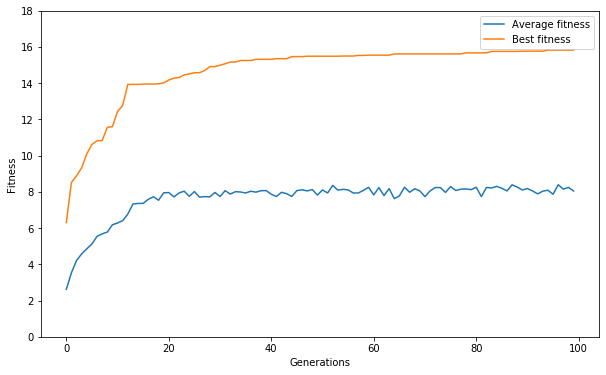

In [0]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, avg, label='Average fitness')
ax.plot(generations, best, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();

In [0]:
# Let's change activation functions set
evolution.pop.activation_set = ActivationFunction()
evolution.pop.activation_set.set_atemporal_set()
evolution.pop.activation_set.unset_lin_group()

# Run training
evolution.pop.restart_population()
avg, best = evolution.run_multiple_trainings(5)

Iteration #0: species = 7, champion_fitness = 16.000000, avg_generation_fitness = 7.860550
Iteration #1: species = 5, champion_fitness = 16.000000, avg_generation_fitness = 9.282526
Iteration #2: species = 6, champion_fitness = 16.000000, avg_generation_fitness = 7.913673
Iteration #3: species = 5, champion_fitness = 16.000000, avg_generation_fitness = 9.432976
Iteration #4: species = 4, champion_fitness = 16.000000, avg_generation_fitness = 8.759418


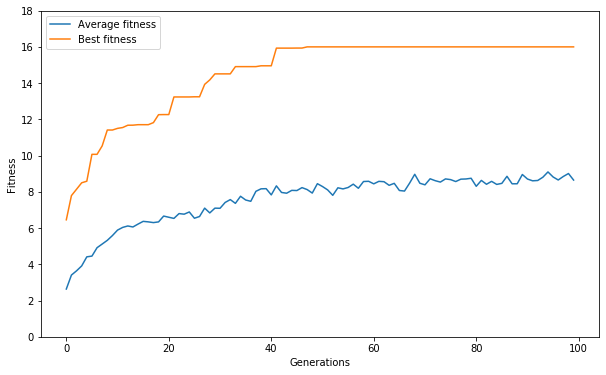

In [0]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, avg, label='Average fitness')
ax.plot(generations, best, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();

In [0]:
champion_connections = evolution.pop.champion_genome.export_genome()['GeneticEncoding']['connections']
champion_nodes = evolution.pop.champion_genome.export_genome()['GeneticEncoding']['nodes']

# Champion genome can be saved to champion.json by calling save_genome() method
# Let's see how many nodes result
print('Nodes {:d}, Connections {:d}'.format(len(champion_nodes), len(champion_connections)))

Nodes 13, Connections 25


In [0]:
node_types = {0: 'INPUT', 1: 'HIDDEN', 2: 'OUTPUT'}

def node_printer(nodes):
    for node in nodes:
        print('Node id {:d}, layer {:d}, type {:s}, activation {:s}'.format(node['nodeID'], 
                                                                            node['row'],
                                                                            node_types[node['type']],
                                                                            node['function']))
def connection_printer(connections):
    for connection in connections:
        print('Connection innovation {:d}, in_id {:d}, out_id {:d}, weigh {:f}, enable {:b}'.format(connection['innovation'],
                                                                                                    connection['in'],
                                                                                                    connection['out'],
                                                                                                    connection['weight'],
                                                                                                    connection['enable']))

In [0]:
# Print champion nodes
node_printer(champion_nodes)

Node id 0, layer 0, type INPUT, activation TANH
Node id 1, layer 0, type INPUT, activation TANH
Node id 2, layer 9, type OUTPUT, activation UNSIGNED_STEP
Node id 4, layer 4, type HIDDEN, activation SIGNED_SIGMOID
Node id 3, layer 4, type HIDDEN, activation UNSIGNED_STEP
Node id 6, layer 2, type HIDDEN, activation SIGNED_GAUSS
Node id 9, layer 6, type HIDDEN, activation SIGNED_SIGMOID
Node id 21, layer 5, type HIDDEN, activation TANH
Node id 31, layer 2, type HIDDEN, activation UNSIGNED_STEP
Node id 14, layer 3, type HIDDEN, activation TANH
Node id 11, layer 2, type HIDDEN, activation UNSIGNED_GAUSS
Node id 24, layer 7, type HIDDEN, activation SIGNED_STEP
Node id 36, layer 3, type HIDDEN, activation TANH


In [0]:
# Print champion connections
connection_printer(champion_connections)
print(len(champion_connections))

Connection innovation 0, in_id 0, out_id 2, weigh -0.865138, enable 0
Connection innovation 1, in_id 1, out_id 2, weigh 0.652333, enable 1
Connection innovation 4, in_id 1, out_id 4, weigh -0.607566, enable 0
Connection innovation 5, in_id 4, out_id 2, weigh 0.973047, enable 1
Connection innovation 2, in_id 0, out_id 3, weigh 0.101535, enable 0
Connection innovation 3, in_id 3, out_id 2, weigh 0.885907, enable 0
Connection innovation 12, in_id 1, out_id 6, weigh -0.766107, enable 0
Connection innovation 13, in_id 6, out_id 4, weigh 0.245138, enable 0
Connection innovation 18, in_id 4, out_id 9, weigh 0.141524, enable 0
Connection innovation 19, in_id 9, out_id 2, weigh 0.224979, enable 1
Connection innovation 7, in_id 4, out_id 2, weigh -0.947403, enable 1
Connection innovation 52, in_id 4, out_id 21, weigh 1.000000, enable 1
Connection innovation 53, in_id 21, out_id 9, weigh -0.018745, enable 1
Connection innovation 8, in_id 1, out_id 4, weigh 0.656049, enable 1
Connection innovation

#CPPN: Compositional Pattern Producing Network
Mixed activation functions produce different connectivity patterns from a node to a target space. Using NEAT as learning algorithm diverse patterns can be obtained in evolution

![alt text](https://i.imgur.com/bNYVnCC.png)

#HyperNEAT and ES-HyperNEAT
Connection mapping in a 2D substrate using NEAT

![alt text](https://i.imgur.com/hfKTMPx.png)

2D layers can be connected between them. In a feed-forward approach connection mapping can be generated as
![alt text](https://i.imgur.com/B13GNVt.png)

ES-HyperNEAT does not declare any nodes position in the hidden layers, the algorithm search for relevant activations from an input node across the target space.

![alt text](https://i.imgur.com/p62nCoY.png)

#HyperNEAT learning gaits

In [0]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/QyVUIM5fVLA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [0]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/uvqSYnoox4s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

#ES-HyperNEAT learning gaits

In [0]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fEHyarE8SXM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [0]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/aYHlDjhvi7A?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

P. Reyes and M. Escobar, "Neuroevolutive Algorithms for Learning Gaits in Legged Robots," in IEEE Access, vol. 7, pp. 142406-142420, 2019.